# Note on Gridworld Action Space Restriction
There is a problem, potentially, since staying in a location is not an allowable action (technically) but an agent could repeatedly choose an invalid action (if the invalid action is selectable in the first place). So I need to further prune the set of actions, depending on the state, but I do not want to do so in a way that is manual.

The way to do this is to count the number of non-corner edge states and account for that in the allowable set of actions. Since the area of the grid is length^2, the perimeter is 4$*$length, and the number of non-corner edge states is therefore 4$*$(length-1) and the number of corners is 4. Therefore, the number of allowable actions (dependent on state) is: $\left(4*{length}^2-4*length\right)*4+4*(length-1)*3+4*2$ so for $length=5$ we have $(100-20)*4+16*3+8=320+48+8=376$ actions.

## SARSA Implementation
To enable graphical output, have the render_init variable = 't' on line 14

done


<IPython.core.display.Javascript object>


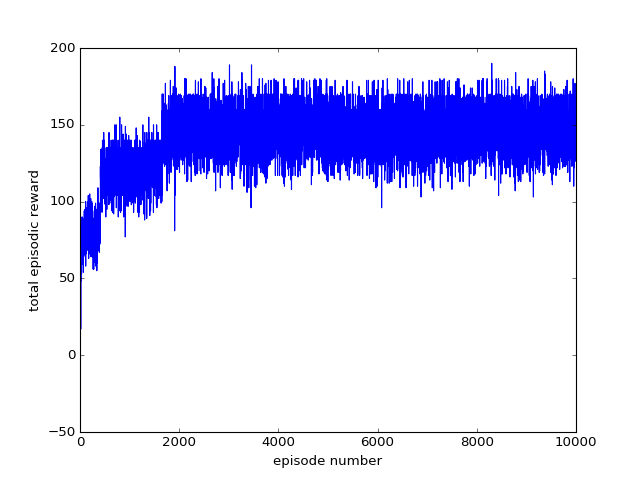

reward model
[[  0.  10.   0.   5.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]
Q function for up action
[[ 16.08318511  20.10504774  15.9582399   16.13530215  10.5564231 ]
 [ 16.20322523  17.38395334  15.72638881  14.50185086  11.73254475]
 [ 14.45252711  15.18673628  14.1956012   12.76053485  10.50650047]
 [ 12.75389219  13.03427907  12.68455889  10.96262278   9.5801517 ]
 [ 11.01191286  11.34079267  10.61602235   9.54201684   6.38121969]]
Q function for down action
[[ 13.95495834  20.25143602  14.08996185  16.10002935  10.06548663]
 [ 12.45390833  13.81493226  12.22771569  11.08572609   9.60861076]
 [ 11.20784147  11.9415094   10.87943584   9.59924148   8.6071456 ]
 [  9.44531784  10.30429925   9.56838368   8.23720159   6.68657039]
 [  9.67915721  10.34544446   9.2830482    8.24980518   6.94170298]]
Q function for left action
[[ 16.14125317  20.26168611  17.9019196   16.29631507  14.26092642]
 [ 14.51719748  1

<IPython.core.display.Javascript object>


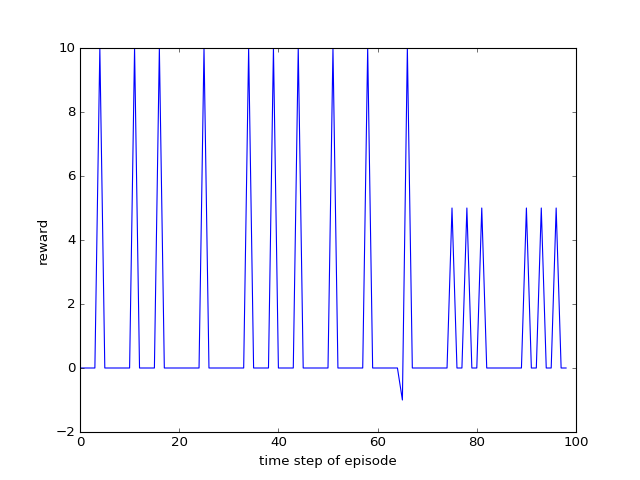

<IPython.core.display.Javascript object>


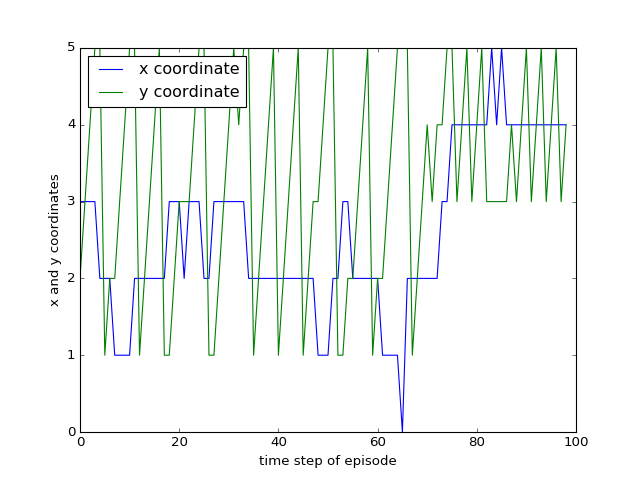

In [86]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker

class gridworld(gym.Env):
  metadata = {'render.modes': ['human']}

  def __init__(self): 
    self.render_label = 'f'
    self.gridnum = int(7) #size of gridworld
    self.location_x = np.random.randint(int(1),self.gridnum-1)
    self.location_y = np.random.randint(int(1),self.gridnum-1)
    self.action = int(0) # no initial action until computed
    self.previous_action = self.action
    self.previous_x = self.location_x
    self.previous_y = self.location_y
    self.previous_previous_x = self.previous_x
    self.previous_previous_y = self.previous_y
    self.allowed_actions = np.array([1,2,3,4])[np.newaxis]
    self.actionSet = np.matrix([1,2,3,4])
    self.episode_length = int(100)
    self.num_episodes = int(10000) # currently only running one episode, 10000
    self.my_alpha = 0.1
    self.my_gamma = 0.9
    self.my_epsilon = 0.1
    self.my_reward =np.array([ [-1,-1,-1,-1,-1,-1,-1],[-1, 0, 10, 0, 5, 0, -1],[-1, 0, 0, 0, 0, 0, -1],\
    [-1, 0, 0, 0, 0, 0, -1],[-1, 0, 0, 0, 0, 0, -1],[-1, 0, 0, 0, 0, 0, -1],[-1, -1, -1, -1, -1, -1, -1] ]) 
    self.my_reward = np.flipud(self.my_reward)
    self.my_reward_model = np.zeros([self.gridnum,self.gridnum])#reward model updated based on observations
    self.my_q_function = np.random.rand(self.gridnum,self.gridnum, int(4))# randomly initialized via reward model
    self.my_q_function[0::6,:,:] = 0# to prevent biasing agent with favorable "out of bound" q functions
    self.my_q_function[:,0::6,:] = 0# to prevent biasing agent with favorable "out of bound" q functions
    self.my_reward_log = np.random.rand(1, self.episode_length*self.num_episodes) # used to store reward for each time step
    self.my_episodic_cumulative_reward_log = np.random.rand(1,self.num_episodes)
    self.update_q_label = 0
    self.color_array = ['blue','orange']
    self.episode_counter = 0
    self.my_action_log = np.random.rand(1, self.episode_length*self.num_episodes)
    self.my_state_log = np.random.rand(2, self.episode_length*self.num_episodes)
    pass
  def my_policy(self):
    if self.update_q_label > 1:
        self.previous_action = self.action # still want this because the agent selected a poor action and should evaluate it
    self.action = self.allowed_actions[0,\
    np.argmax(self.my_q_function[self.location_x,self.location_y,self.allowed_actions-1])]
    if np.random.rand() <= self.my_epsilon:
        self.action = self.allowed_actions[0,np.random.randint(0,self.allowed_actions.shape[1])]
    pass
  def render(self,fig,ax,time_index): #mode='human', close=False <- no idea what this is for
    ax = fig.gca()    
    ax.clear()
    ax.grid(which='major', axis='both', linestyle='-')
    circle2 = plt.Circle((world.location_x+0.5, world.location_y+0.5), 0.5, color=self.color_array[np.mod(self.episode_counter,2)])#rand initialization
    ax.add_artist(circle2)
    fig.canvas.draw()
    pass
  def render_init(self):
    fig, (ax)=plt.subplots()
    intervals = float(1/world.gridnum)# dimension of grid affects size
    loc = plticker.MultipleLocator(base=intervals)
    ax.xaxis.set_major_locator(loc)
    ax.set_xlim(0, world.gridnum)
    ax.yaxis.set_major_locator(loc)
    ax.set_ylim(0, world.gridnum)
    return fig, ax
  def reset(self):
    self.location_x = np.random.randint(int(1),self.gridnum-1)
    self.location_y = np.random.randint(int(1),self.gridnum-1)
    self.previous_x = self.location_x
    self.previous_y = self.location_y
    self.previous_previous_x = self.previous_x
    self.previous_previous_y = self.previous_y
    self.update_q_label = 0
    self.episode_counter += 1
    pass
  def step(self):
    self.previous_previous_x = self.previous_x
    self.previous_previous_y = self.previous_y
    self.previous_x = self.location_x# only accurate for second step in episode
    self.previous_y = self.location_y# only accurate for second step in episode
    desired_action = self.action
    if np.random.rand() <= 0.1: # this part of the method is to enforce a 10% chance of a random transition
        self.action = self.allowed_actions[0,np.random.randint(1,self.allowed_actions.shape[1])]
    if self.my_reward[self.location_y,self.location_x] > 0:
        self.location_x = 3+1
        self.location_y = 2+1
        if self.my_reward[self.previous_y,self.previous_x] > 5:
            self.location_x = 1+1
            self.location_y = 0+1
    elif self.action == 1: # this part of the method is to select the desired deterministic action
        self.location_y += 1
    elif self.action == 2:
        self.location_y += -1
    elif self.action == 3:
        self.location_x += -1
    elif self.action == 4:
        self.location_x += 1
    self.action = desired_action# reports selected action, but has the agent move according to transition probability
    pass #return [(self.location_x, self.location_y)]
  def update_reward_model(self):# reversed y and x for reward (not model) to accommodate human-readable reward
    self.my_reward_model[self.location_y,self.location_x] = self.my_reward[self.location_y,self.location_x]
    pass
  def update_my_q_function(self):#,action,location_x,location_y):
    if self.update_q_label > 1:# update_q_label ensures that we do not update the q function when location is reset
        self.my_q_function[self.previous_previous_x,self.previous_previous_y,self.previous_action-1] +=\
        self.my_alpha*(self.my_reward_model[self.previous_previous_y,self.previous_previous_x]+\
        self.my_gamma*self.my_q_function[self.previous_x,self.previous_y,self.action-1]-\
        self.my_q_function[self.previous_previous_x,self.previous_previous_y,self.previous_action-1])
    pass
world = gridworld()
if world.render_label == 't':
    fig, (ax) = world.render_init()
k=0 # counter for episodic cumulative reward
for i in range(1,world.episode_length * world.num_episodes - 1):
    world.update_reward_model()
    world.my_reward_log[0,i] = world.my_reward[world.location_y,world.location_x]
    world.my_state_log[:,i] = np.array([world.location_x,world.location_y])[np.newaxis]
    world.update_my_q_function()#update is for previous state, so put before state reversion
    world.update_q_label += 1# default is to update the q function after the first iteration
    if world.my_reward[world.location_y,world.location_x] < 0:
        world.location_x = world.previous_x
        world.location_y = world.previous_y
    world.my_policy() # closest to pragmatic results here
    world.step()# current state is now state AFTER action has been taken
    if np.mod(i+1,world.episode_length) == 0:
        world.my_episodic_cumulative_reward_log[0,k] = \
        np.sum(world.my_reward_log[0,(k*world.episode_length):(i+1)])# sums from k*episode_length to i
        k += 1
        world.reset()
    world.my_action_log[:,i] = world.action
    progress_checker = np.floor(0.1*world.episode_length*world.num_episodes)
    if np.mod(i+1,progress_checker) == 0:
        sys.stdout.write("\r"+"%s" % int(10+np.floor(i/progress_checker)*10) + '%')#updates progress without excessive output
    if world.render_label == 't':
        world.render(fig,ax,i)
sys.stdout.write("\r"+'done' + '\n')#displays complete progress and prints results on new lines
fig1, (ax1)=plt.subplots()
ax1.plot(world.my_episodic_cumulative_reward_log[0,0:-1])
plt.xlabel('episode number')
plt.ylabel('total episodic reward')
print('reward model' + '\n' + str(np.flipud(world.my_reward_model[1:6,1:6])))
print('Q function for up action' + '\n' + str(np.flipud(np.transpose(world.my_q_function[1:6,1:6,0]))))
print('Q function for down action' + '\n' + str(np.flipud(np.transpose(world.my_q_function[1:6,1:6,1]))))
print('Q function for left action' + '\n' + str(np.flipud(np.transpose(world.my_q_function[1:6,1:6,2]))))
print('Q function for right action' + '\n' + str(np.flipud(np.transpose(world.my_q_function[1:6,1:6,3]))))
print('total reward = ' + str(np.sum(world.my_reward_log[0,-world.episode_length:-1])))
fig2, (ax2) = plt.subplots()
ax2.plot(world.my_reward_log[0,-world.episode_length:-1])
plt.xlabel('time step of episode')
plt.ylabel('reward')
fig3, (ax3) = plt.subplots()
ax3.plot(np.transpose(world.my_state_log[0,-world.episode_length:-1]), label='x coordinate')
ax3.plot(np.transpose(world.my_state_log[1,-world.episode_length:-1]), label='y coordinate')
plt.xlabel('time step of episode')
plt.ylabel('x and y coordinates')
pylab.legend(loc='upper left')

## Q Learning Method

done


<IPython.core.display.Javascript object>


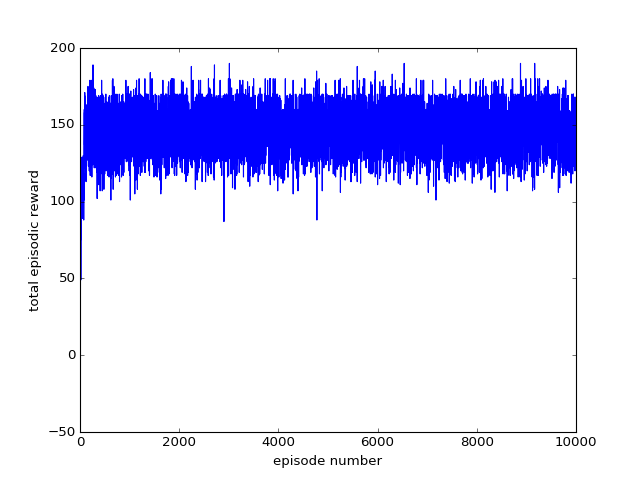

reward model
[[  0.  10.   0.   5.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]
Q function for up action
[[ 17.95917448  21.99500969  17.32262443  16.99673273   9.47819632]
 [ 16.99247572  19.00601578  17.2406332   15.21227947  13.49987899]
 [ 15.74715337  17.23726992  13.94221235  13.0890311   12.00161817]
 [ 13.83138945  15.48897983  12.63118574  11.62870519   9.08152212]
 [ 12.21397155  13.95403695  11.19762607  10.3037609    7.78168567]]
Q function for down action
[[ 16.02461063  22.34247664  15.81966588  17.01761085  10.3087878 ]
 [ 14.29019119  15.50960951  14.02351457  12.48698182  10.91690745]
 [ 12.41696473  13.64579364  12.04137824  10.82382411   9.13452196]
 [ 11.22499458  11.97856583  10.74325658   9.79463941   7.73488611]
 [ 11.00947616  12.03926101  10.70125761   9.69940201   5.36761688]]
Q function for left action
[[ 17.20811787  22.0141156   19.7950442   16.98989211  15.20953369]
 [ 15.72529925  1

<IPython.core.display.Javascript object>


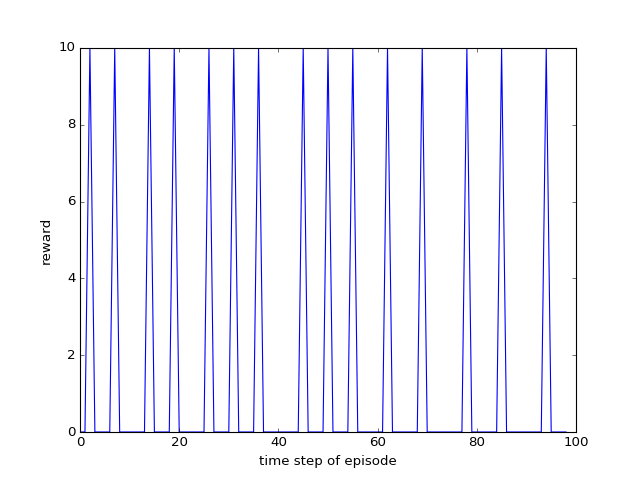

<IPython.core.display.Javascript object>


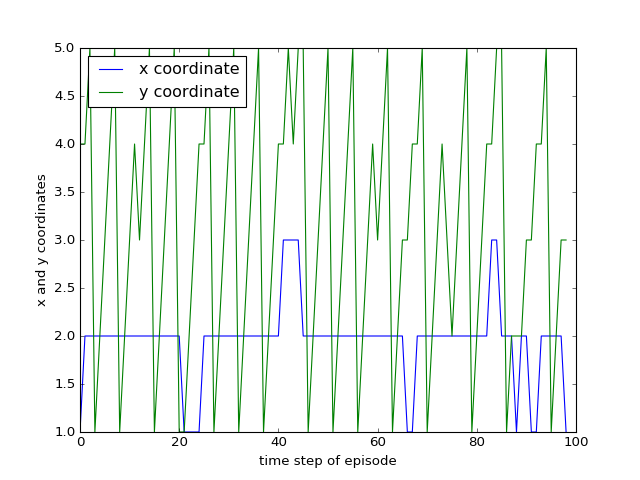

In [88]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker

class gridworld(gym.Env):
  metadata = {'render.modes': ['human']}

  def __init__(self): 
    self.render_label = 'f'
    self.gridnum = int(7) #size of gridworld
    self.location_x = np.random.randint(int(1),self.gridnum-1)
    self.location_y = np.random.randint(int(1),self.gridnum-1)
    self.action = int(0) # no initial action until computed
    self.previous_action = self.action
    self.previous_x = self.location_x
    self.previous_y = self.location_y
    self.previous_previous_x = self.previous_x
    self.previous_previous_y = self.previous_y
    self.allowed_actions = np.array([1,2,3,4])[np.newaxis]
    self.actionSet = np.matrix([1,2,3,4])
    self.episode_length = int(100)
    self.num_episodes = int(10000) # currently only running one episode, 10000
    self.my_alpha = 0.1
    self.my_gamma = 0.9
    self.my_epsilon = 0.1
    self.my_reward =np.array([ [-1,-1,-1,-1,-1,-1,-1],[-1, 0, 10, 0, 5, 0, -1],[-1, 0, 0, 0, 0, 0, -1],\
    [-1, 0, 0, 0, 0, 0, -1],[-1, 0, 0, 0, 0, 0, -1],[-1, 0, 0, 0, 0, 0, -1],[-1, -1, -1, -1, -1, -1, -1] ]) 
    self.my_reward = np.flipud(self.my_reward)
    self.my_reward_model = np.zeros([self.gridnum,self.gridnum])#reward model updated based on observations
    self.my_q_function = np.random.rand(self.gridnum,self.gridnum, int(4))# randomly initialized via reward model
    self.my_q_function[0::6,:,:] = 0# to prevent biasing agent with favorable "out of bound" q functions
    self.my_q_function[:,0::6,:] = 0# to prevent biasing agent with favorable "out of bound" q functions
    self.my_reward_log = np.random.rand(1, self.episode_length*self.num_episodes) # used to store reward for each time step
    self.my_episodic_cumulative_reward_log = np.random.rand(1,self.num_episodes)
    self.update_q_label = 0
    self.color_array = ['blue','orange']
    self.episode_counter = 0
    self.my_action_log = np.random.rand(1, self.episode_length*self.num_episodes)
    self.my_state_log = np.random.rand(2, self.episode_length*self.num_episodes)
    pass
  def my_policy(self):
    if self.update_q_label > 1:
        self.previous_action = self.action # still want this because the agent selected a poor action and should evaluate it
    self.action = self.allowed_actions[0,\
    np.argmax(self.my_q_function[self.location_x,self.location_y,self.allowed_actions-1])]
    if np.random.rand() <= self.my_epsilon:
        self.action = self.allowed_actions[0,np.random.randint(0,self.allowed_actions.shape[1])]
    return self.location_y,self.location_x,self.action
  def render(self,fig,ax,time_index): #mode='human', close=False <- no idea what this is for
    ax = fig.gca()    
    ax.clear()
    ax.grid(which='major', axis='both', linestyle='-')
    circle2 = plt.Circle((world.location_x+0.5, world.location_y+0.5), 0.5, color=self.color_array[np.mod(self.episode_counter,2)])#rand initialization
    ax.add_artist(circle2)
    fig.canvas.draw()
    pass
  def render_init(self):
    fig, (ax)=plt.subplots()
    intervals = float(1/world.gridnum)# dimension of grid affects size
    loc = plticker.MultipleLocator(base=intervals)
    ax.xaxis.set_major_locator(loc)
    ax.set_xlim(0, world.gridnum)
    ax.yaxis.set_major_locator(loc)
    ax.set_ylim(0, world.gridnum)
    return fig, ax
  def reset(self):
    self.location_x = np.random.randint(int(1),self.gridnum-1)
    self.location_y = np.random.randint(int(1),self.gridnum-1)
    self.previous_x = self.location_x
    self.previous_y = self.location_y
    self.previous_previous_x = self.previous_x
    self.previous_previous_y = self.previous_y
    self.update_q_label = 0
    self.episode_counter += 1
    pass
  def step(self):
    self.previous_previous_x = self.previous_x
    self.previous_previous_y = self.previous_y
    self.previous_x = self.location_x# only accurate for second step in episode
    self.previous_y = self.location_y# only accurate for second step in episode
    desired_action = self.action
    if np.random.rand() <= 0.1: # this part of the method is to enforce a 10% chance of a random transition
        self.action = self.allowed_actions[0,np.random.randint(1,self.allowed_actions.shape[1])]
    if self.my_reward[self.location_y,self.location_x] > 0:
        self.location_x = 3+1
        self.location_y = 2+1
        if self.my_reward[self.previous_y,self.previous_x] > 5:
            self.location_x = 1+1
            self.location_y = 0+1
    elif self.action == 1: # this part of the method is to select the desired deterministic action
        self.location_y += 1
    elif self.action == 2:
        self.location_y += -1
    elif self.action == 3:
        self.location_x += -1
    elif self.action == 4:
        self.location_x += 1
    self.action = desired_action# reports selected action, but has the agent move according to transition probability
    pass #return [(self.location_x, self.location_y)]
  def update_reward_model(self):# reversed y and x for reward (not model) to accommodate human-readable reward
    self.my_reward_model[self.location_y,self.location_x] = self.my_reward[self.location_y,self.location_x]
    pass
  def update_my_q_function(self):#,action,location_x,location_y):
    if self.update_q_label > 1:# update_q_label ensures that we do not update the q function when location is reset
        self.my_q_function[self.previous_previous_x,self.previous_previous_y,self.previous_action-1] +=\
        self.my_alpha*(self.my_reward_model[self.previous_previous_y,self.previous_previous_x]+\
        self.my_gamma*np.amax(self.my_q_function[self.previous_x,self.previous_y,:])-\
        self.my_q_function[self.previous_previous_x,self.previous_previous_y,self.previous_action-1])
    pass
world = gridworld()
if world.render_label == 't':
    fig, (ax) = world.render_init()
k=0 # counter for episodic cumulative reward
for i in range(1,world.episode_length * world.num_episodes - 1):
    world.update_reward_model()
    world.my_reward_log[0,i] = world.my_reward[world.location_y,world.location_x]
    world.my_state_log[:,i] = np.array([world.location_x,world.location_y])[np.newaxis]
    world.update_my_q_function()#update is for previous state, so put before state reversion
    world.update_q_label += 1# default is to update the q function after the first iteration
    if world.my_reward[world.location_y,world.location_x] < 0:
        world.location_x = world.previous_x
        world.location_y = world.previous_y
    world.my_policy() # closest to pragmatic results here
    world.step()# current state is now state AFTER action has been taken
    if np.mod(i+1,world.episode_length) == 0:
        world.my_episodic_cumulative_reward_log[0,k] = \
        np.sum(world.my_reward_log[0,(k*world.episode_length):(i+1)])# sums from k*episode_length to i
        k += 1
        world.reset()
    world.my_action_log[:,i] = world.action
    progress_checker = np.floor(0.1*world.episode_length*world.num_episodes)
    if np.mod(i+1,progress_checker) == 0:
        sys.stdout.write("\r"+"%s" % int(10+np.floor(i/progress_checker)*10) + '%')#updates progress without excessive output
    if world.render_label == 't':
        world.render(fig,ax,i)
sys.stdout.write("\r"+'done' + '\n')#displays complete progress and prints results on new lines
fig1, (ax1)=plt.subplots()
ax1.plot(world.my_episodic_cumulative_reward_log[0,0:-1])
plt.xlabel('episode number')
plt.ylabel('total episodic reward')
print('reward model' + '\n' + str(np.flipud(world.my_reward_model[1:6,1:6])))
print('Q function for up action' + '\n' + str(np.flipud(np.transpose(world.my_q_function[1:6,1:6,0]))))
print('Q function for down action' + '\n' + str(np.flipud(np.transpose(world.my_q_function[1:6,1:6,1]))))
print('Q function for left action' + '\n' + str(np.flipud(np.transpose(world.my_q_function[1:6,1:6,2]))))
print('Q function for right action' + '\n' + str(np.flipud(np.transpose(world.my_q_function[1:6,1:6,3]))))
print('total reward = ' + str(np.sum(world.my_reward_log[0,-world.episode_length:-1])))
fig2, (ax2) = plt.subplots()
ax2.plot(world.my_reward_log[0,-world.episode_length:-1])
plt.xlabel('time step of episode')
plt.ylabel('reward')
fig3, (ax3) = plt.subplots()
ax3.plot(np.transpose(world.my_state_log[0,-world.episode_length:-1]), label='x coordinate')
ax3.plot(np.transpose(world.my_state_log[1,-world.episode_length:-1]), label='y coordinate')
plt.xlabel('time step of episode')
plt.ylabel('x and y coordinates')
pylab.legend(loc='upper left')